### **INIT**

In [ ]:
%%capture
!pip install q tensorflow==2.1
!pip install q keras==2.3.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
import itertools
saved_output = []

def plot_gallery(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[r], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[r]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    #plt.savefig("predict.png")

def plot_gallery_norand(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
#         r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[i]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

def plot_gallery_predict(images, predict, true, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[r], cmap=plt.cm.gray)
        plt.title('p:' + str(predict[r]) + '   t:' + str(true[r]), size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    #plt.savefig("predict.png")

In [ ]:
loc_collection = '/content/drive/My Drive/Notebook/Auto_Collection_Gray/'
shape = 'Square'
# shape = 'No_Margin'
char_list_nameonly = [
    'Alif‬', 'Bā’', 'Tā’', 'Ṡā’‬', 'Jīm', 'Ḥā’‬', 'Khā’‬',
    'Dāl‬', 'Żāl‬', 'Rā’‬', 'zai‬', 'sīn‬', 'syīn‬', 'ṣād',
    'ḍād', 'ṭā’‬', 'ẓȧ’‬', '‘ain', 'gain‬', 'fā’‬', 'qāf‬',
    'kāf‬', 'lām‬', 'mīm‬', 'nūn‬', 'wāw‬', 'hā’‬', 'yā’‬'
]
import pickle
filename = '/content/drive/My Drive/Notebook/sameratio_keepform.pkl'
sameratio_keepform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/diffratio_keepform.pkl'
diffratio_keepform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/sameratio_diffform.pkl'
sameratio_diffform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/diffratio_diffform.pkl'
diffratio_diffform = pickle.load(open(filename, 'rb'))

print(sameratio_keepform.keys())
print(diffratio_keepform.keys())
print(sameratio_diffform.keys())
print(diffratio_diffform.keys())

dict_keys(['sk_32_bh', 'sk_32_bw', 'sk_sibh', 'sk_sibw', 'sk_largest'])
dict_keys(['dk_32', 'dk_sibh', 'dk_sibw', 'dk_libh', 'dk_libw'])
dict_keys(['sd_32', 'sd_smallest', 'sd_largest'])
dict_keys(['dd_32', 'dd_sibh', 'dd_sibw', 'dd_libh', 'dd_libw'])


In [ ]:
data_dk = []
label_dk = []
for i in range(0,28):
    for x in range(len(diffratio_keepform['dk_32'][i])):
        gd = diffratio_keepform['dk_32'][i][x]
        data_dk.append(diffratio_keepform['dk_32'][i][x])
        label_dk.append(i)
data_dk = np.array(data_dk)
label_dk = np.array(label_dk)

data_sk = []
data_sk_temp = []
label_sk = []
for i in range(0,28):
    for x in range(len(sameratio_keepform['sk_32_bh'][i])):
        data_sk_temp.append(sameratio_keepform['sk_32_bh'][i][x])
        label_sk.append(i)
for x in range(len(data_sk_temp)):
    h, w = data_sk_temp[x].shape
    if h and w > 32:
        img = cv2.resize(data_sk_temp[x], (32, 32))
        print(x)
    else:
        img = data_sk_temp[x]
    y = list(img.ravel())
    y = np.array(y)
    data_sk.append(y.reshape(32, 32))
data_sk = np.array(data_sk)
label_sk = np.array(label_sk)

data_sd = []
label_sd = []
for i in range(0,28):
    for x in range(len(sameratio_diffform['sd_largest'][i])):
        data_sd.append(sameratio_diffform['sd_largest'][i][x])
        label_sd.append(i)
data_sd = np.array(data_sd)
label_sd = np.array(label_sd)
data_sd_32 = []
for data in data_sd:
  data_sd_32.append(cv2.resize(data, (32,32)))
data_sd_32 = np.array(data_sd_32)
data_sd = data_sd_32

data_dd = []
label_dd = []
for i in range(0,28):
    for x in range(len(diffratio_diffform['dd_32'][i])):
        data_dd.append(diffratio_diffform['dd_32'][i][x])
        label_dd.append(i)
data_dd = np.array(data_dd)
label_dd = np.array(label_dd)

1311


sameratio_keepform


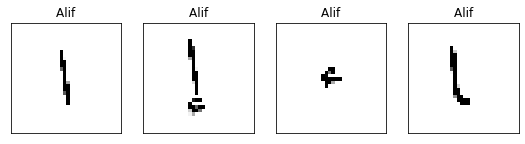

diffratio_keepform


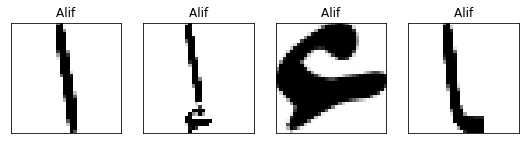

sameratio_diffform


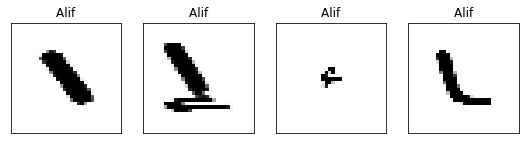

diffratio_diffform


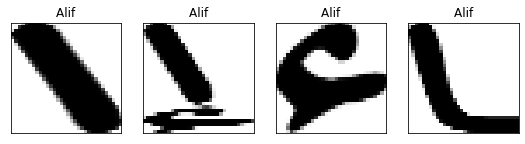

In [ ]:
print('sameratio_keepform')
plot_gallery_norand(data_sk, label_sk, 1, 4)
print('diffratio_keepform')
plot_gallery_norand(data_dk, label_dk, 1, 4)
print('sameratio_diffform')
plot_gallery_norand(data_sd, label_sd, 1, 4)
print('diffratio_diffform')
plot_gallery_norand(data_dd, label_dd, 1, 4)

### **Data**

(1452, 32, 32)
(1452,)


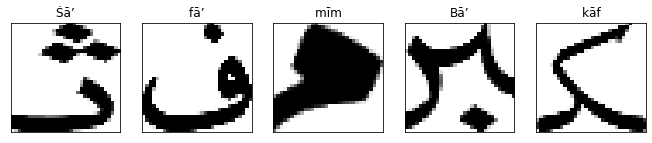

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42

dtype = 'DD'
data_train, data_test, y_train, y_test = train_test_split(
data_dd, label_dd, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [ ]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


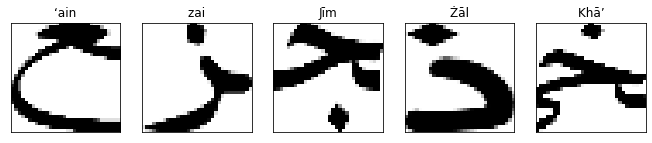

Testing Data 363


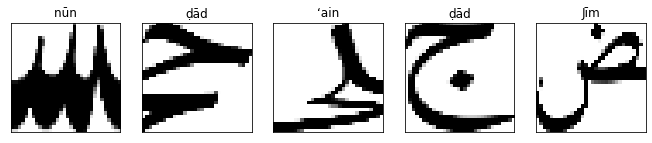

In [ ]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [ ]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

### **Model**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.utils.np_utils import to_categorical
import keras
import keras.backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization, MaxPooling2D
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU, AveragePooling2D
import numpy
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

In [ ]:
def ElSawy(n_classes):
  model = Sequential()
  # C1
  model.add(Conv2D(filters = 80, 
                    kernel_regularizer='l2',
                    kernel_size = 5,
                    activation = 'relu', 
                    input_shape = (32,32,1)))
  # S2
  model.add(MaxPooling2D(pool_size = 2))
  # C3
  model.add(Conv2D(filters = 64,
                    kernel_regularizer='l2',
                    kernel_size = 5,
                    activation = 'relu' ))
  # S4
  model.add(MaxPooling2D(pool_size = 2))
  # FC 5
  model.add(Flatten())
  model.add(Dense(units = 1024, 
                  activation = 'relu',
                  kernel_regularizer='l2'))
  model.add(Dense(units = 28, activation = 'softmax'))

  # Compile model
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
%%time
n_classes = 28
ep = 150
bs = 32

K.clear_session()
model = ElSawy(n_classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 80)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 80)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        128064    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1639424   
_________________________________________________________________
dense_2 (Dense)              (None, 28)               

In [ ]:
%%time
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('ElSawy')
    filename = '/content/drive/My Drive/Notebook/Training_Files/ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/150
1161/1161 [==============================] - 1s 481us/step - loss: 8.8302 - accuracy: 0.1421 - val_loss: 3.8903 - val_accuracy: 0.3024
Epoch 2/150
1161/1161 [==============================] - 0s 229us/step - loss: 2.8542 - accuracy: 0.4643 - val_loss: 2.3058 - val_accuracy: 0.5704
Epoch 3/150
1161/1161 [==============================] - 0s 206us/step - loss: 1.8727 - accuracy: 0.6761 - val_loss: 2.0121 - val_accuracy: 0.6323
Epoch 4/150
1161/1161 [==============================] - 0s 206us/step - loss: 1.4780 - accuracy: 0.7778 - val_loss: 1.8317 - val_accuracy: 0.6667
Epoch 5/150
1161/1161 [==============================] - 0s 197us/step - loss: 1.2591 - accuracy: 0.8277 - val_loss: 1.6611 - val_accuracy: 0.7388
Epoch 6/150
1161/1161 [==============================] - 0s 199us/step - loss: 1.1256 - accuracy: 0.8562 - val_loss: 1.5900 - val_accuracy: 0.7251
Epoch 7/150
1161/1161 [==============================] - 0s 214u

### **Result**

k =  1


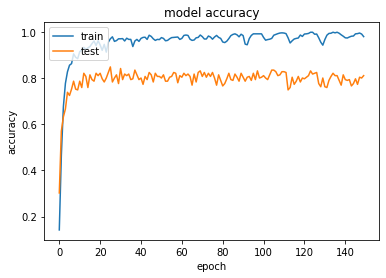

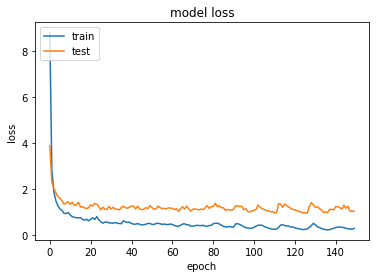

k =  2


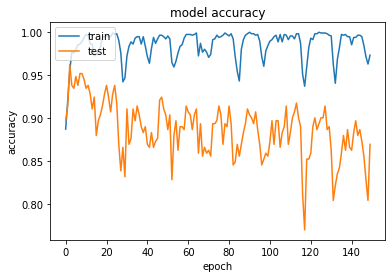

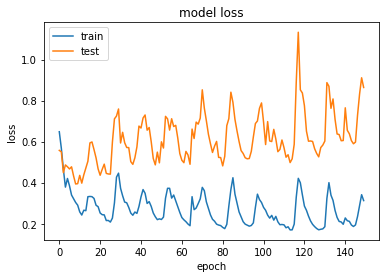

k =  3


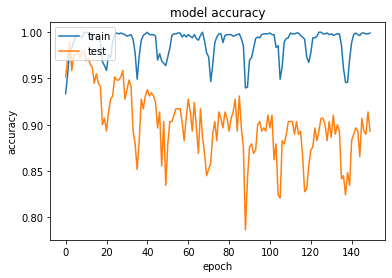

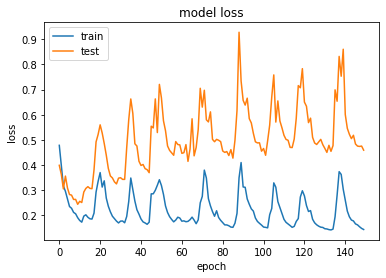

k =  4


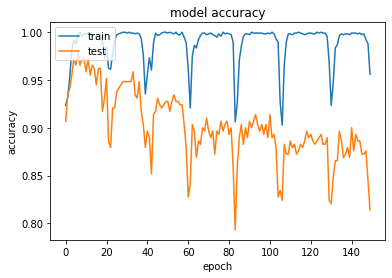

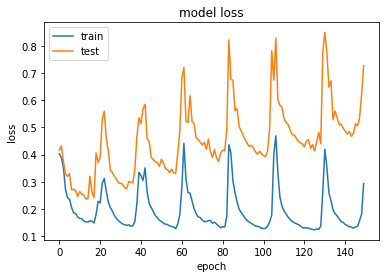

k =  5


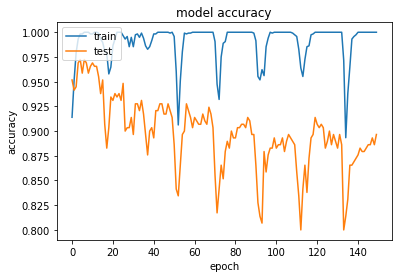

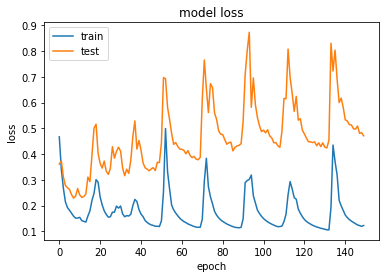

In [ ]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.67      0.93      0.78        15
           2       0.81      0.84      0.82        25
           3       0.91      0.53      0.67        19
           4       0.83      0.65      0.73        23
           5       0.76      0.67      0.71        24
           6       0.55      0.86      0.67        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.70      0.88      0.78         8
          12       0.82      0.88      0.85        16
          13       0.79      1.00      0.88        11
          14       0.80      0.73      0.76        11
          15       1.00      1.00      1.00        11
          16       0.83      1.00      0.91         5
          17       0.64    

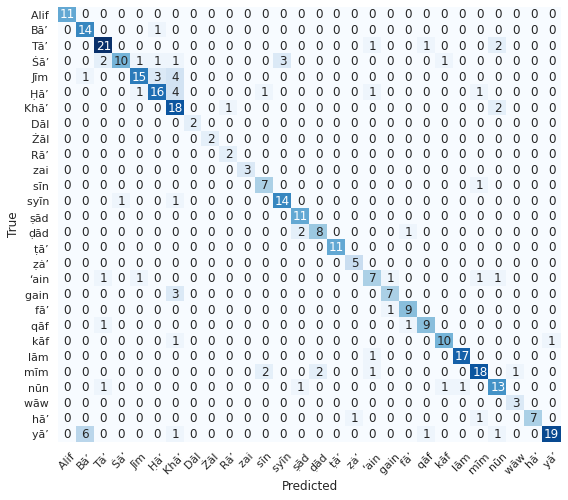

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next DK**

In [ ]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


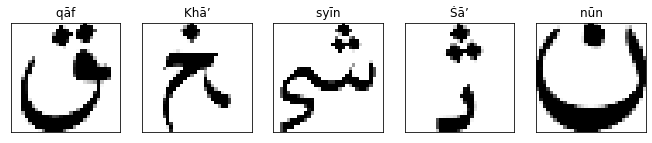

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'DK'
data_train, data_test, y_train, y_test = train_test_split(
data_dk, label_dk, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [ ]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


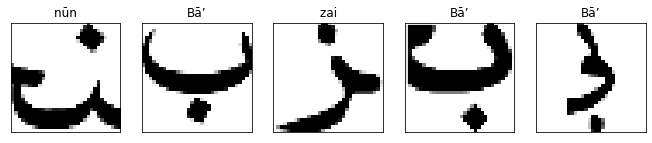

Testing Data 363


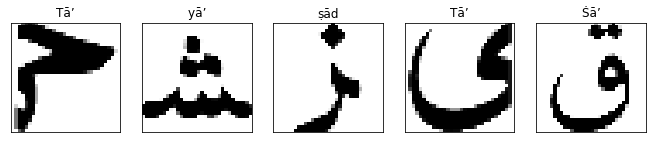

In [ ]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [ ]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [ ]:
%%time
K.clear_session()
model = ElSawy(n_classes)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('ElSawy')
    filename = '/content/drive/My Drive/Notebook/Training_Files/ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/150
1161/1161 [==============================] - 1s 434us/step - loss: 8.7760 - accuracy: 0.1120 - val_loss: 4.0288 - val_accuracy: 0.2474
Epoch 2/150
1161/1161 [==============================] - 0s 253us/step - loss: 2.8472 - accuracy: 0.3936 - val_loss: 2.2531 - val_accuracy: 0.5017
Epoch 3/150
1161/1161 [==============================] - 0s 217us/step - loss: 1.8739 - accuracy: 0.6245 - val_loss: 1.8315 - val_accuracy: 0.6495
Epoch 4/150
1161/1161 [==============================] - 0s 202us/step - loss: 1.4779 - accuracy: 0.7554 - val_loss: 1.5594 - val_accuracy: 0.7457
Epoch 5/150
1161/1161 [==============================] - 0s 199us/step - loss: 1.2402 - accuracy: 0.8208 - val_loss: 1.4230 - val_accuracy: 0.7732
Epoch 6/150
1161/1161 [==============================] - 0s 207us/step - loss: 1.0750 - accuracy: 0.8536 - val_loss: 1.3064 - val_accuracy: 0.8144
Epoch 7/150
1161/1161 [==============================] - 0s 205u

k =  1


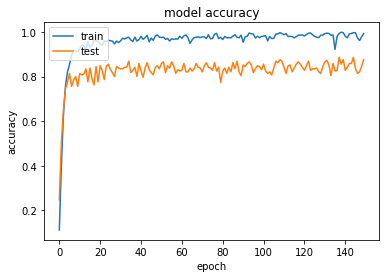

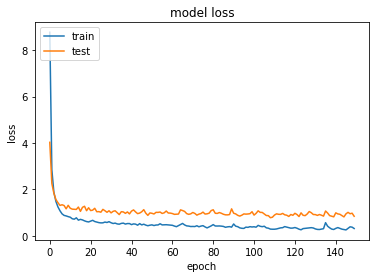

k =  2


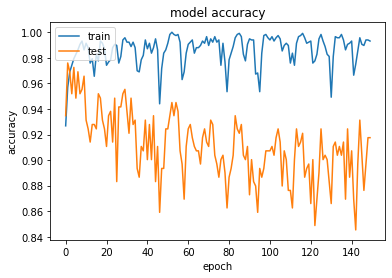

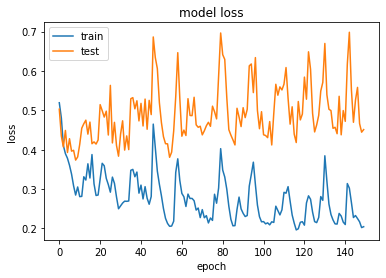

k =  3


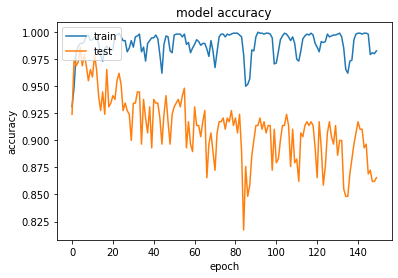

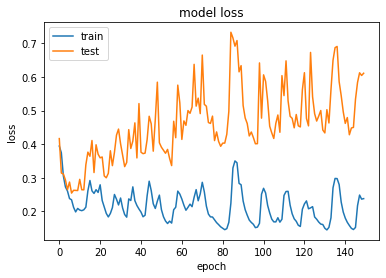

k =  4


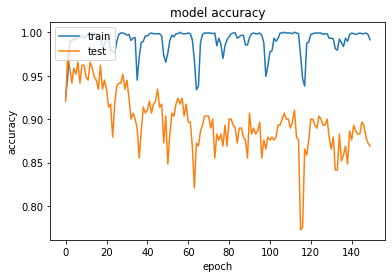

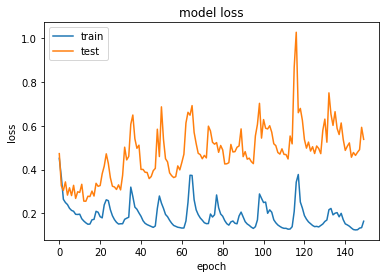

k =  5


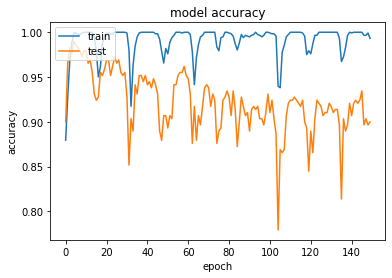

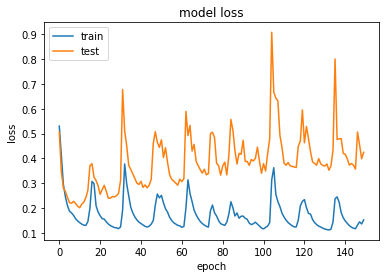

In [ ]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.65      0.87      0.74        15
           2       0.96      0.96      0.96        25
           3       0.79      0.79      0.79        19
           4       0.83      0.87      0.85        23
           5       0.80      0.67      0.73        24
           6       0.71      0.81      0.76        21
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       0.75      1.00      0.86         3
          11       1.00      0.75      0.86         8
          12       0.94      0.94      0.94        16
          13       0.79      1.00      0.88        11
          14       0.69      0.82      0.75        11
          15       1.00      1.00      1.00        11
          16       0.83      1.00      0.91         5
          17       0.86    

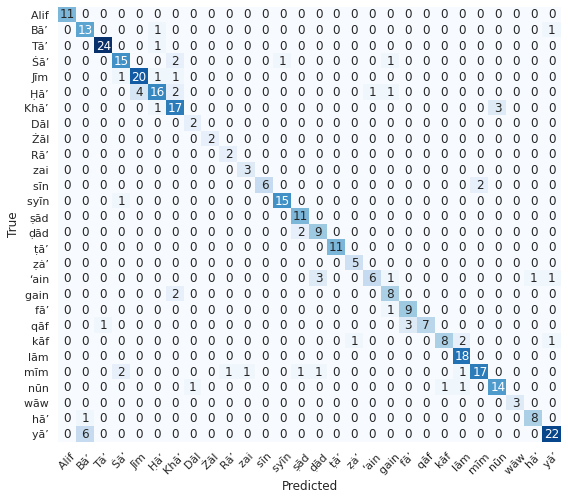

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next SK**

In [ ]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


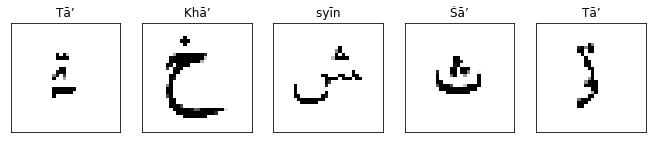

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'SK'
data_train, data_test, y_train, y_test = train_test_split(
data_sk, label_sk, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [ ]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


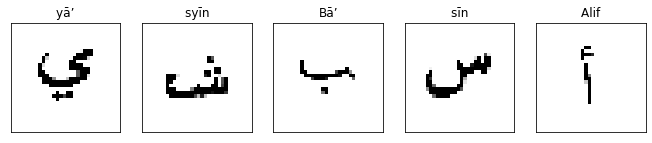

Testing Data 363


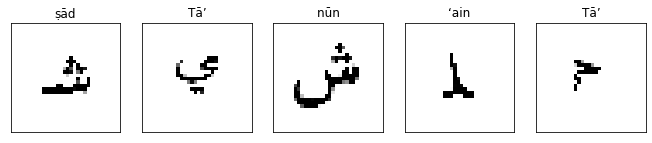

In [ ]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [ ]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [ ]:
%%time
K.clear_session() 
model = ElSawy(n_classes)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('ElSawy')
    filename = '/content/drive/My Drive/Notebook/Training_Files/ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/150
1161/1161 [==============================] - 1s 435us/step - loss: 8.8567 - accuracy: 0.0448 - val_loss: 4.3213 - val_accuracy: 0.1168
Epoch 2/150
1161/1161 [==============================] - 0s 220us/step - loss: 3.3687 - accuracy: 0.1852 - val_loss: 2.7906 - val_accuracy: 0.2749
Epoch 3/150
1161/1161 [==============================] - 0s 210us/step - loss: 2.5085 - accuracy: 0.3402 - val_loss: 2.2339 - val_accuracy: 0.4158
Epoch 4/150
1161/1161 [==============================] - 0s 197us/step - loss: 2.0803 - accuracy: 0.4772 - val_loss: 2.0249 - val_accuracy: 0.5052
Epoch 5/150
1161/1161 [==============================] - 0s 197us/step - loss: 1.8635 - accuracy: 0.5401 - val_loss: 1.8871 - val_accuracy: 0.5498
Epoch 6/150
1161/1161 [==============================] - 0s 196us/step - loss: 1.6935 - accuracy: 0.6038 - val_loss: 1.9444 - val_accuracy: 0.5395
Epoch 7/150
1161/1161 [==============================] - 0s 201u

k =  1


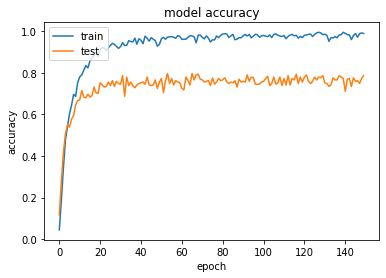

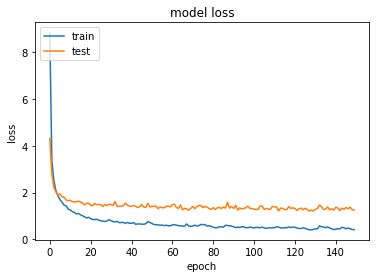

k =  2


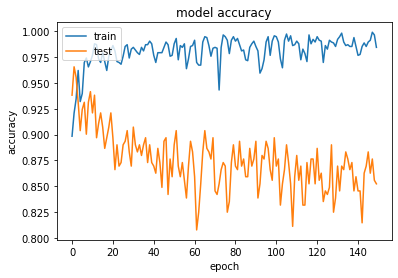

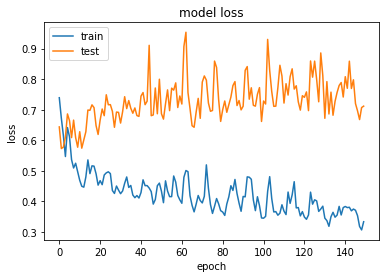

k =  3


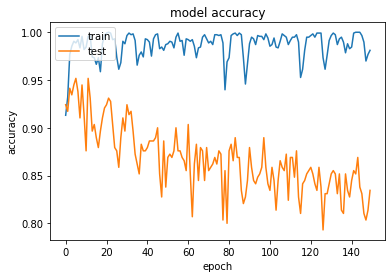

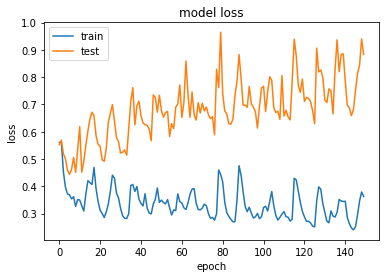

k =  4


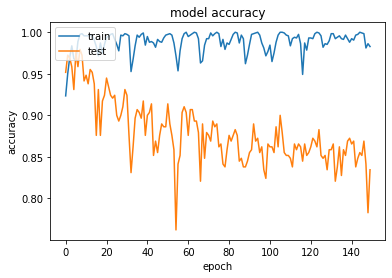

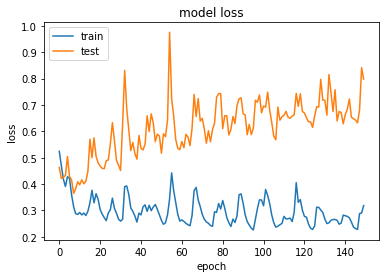

k =  5


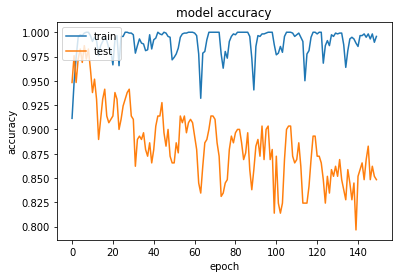

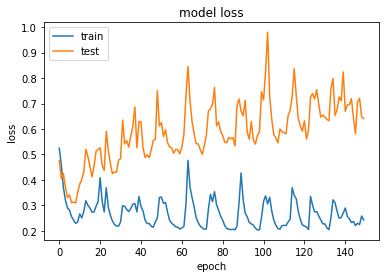

In [70]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.57      0.80      0.67        15
           2       0.88      0.84      0.86        25
           3       0.84      0.84      0.84        19
           4       0.77      0.87      0.82        23
           5       0.70      0.79      0.75        24
           6       0.67      0.48      0.56        21
           7       1.00      1.00      1.00         2
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       1.00      0.88      0.93        16
          13       1.00      1.00      1.00        11
          14       1.00      0.91      0.95        11
          15       0.91      0.91      0.91        11
          16       0.83      1.00      0.91         5
          17       0.67    

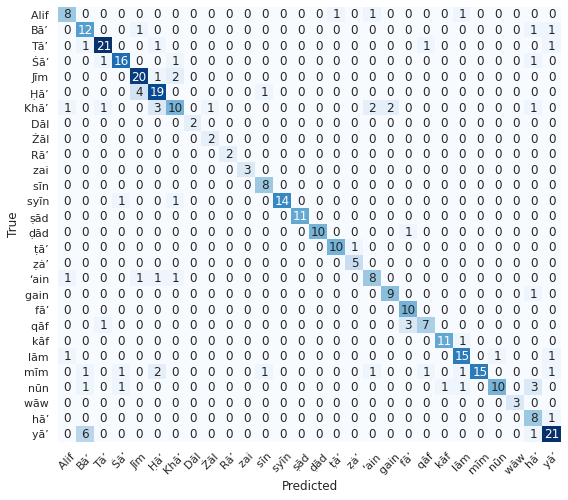

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next SD**

In [72]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


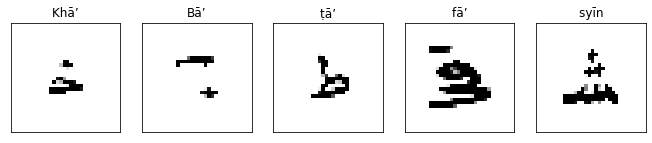

In [73]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'SD'
data_train, data_test, y_train, y_test = train_test_split(
data_sd, label_sd, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [74]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


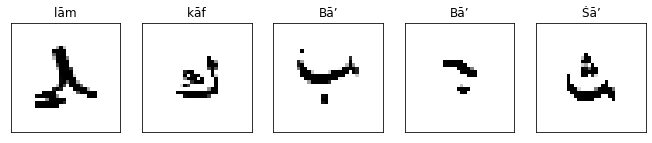

Testing Data 363


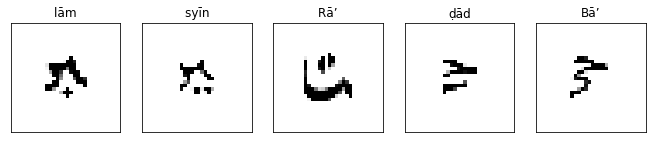

In [75]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [76]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [77]:
%%time
K.clear_session() 
model = ElSawy(n_classes)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('ElSawy')
    filename = '/content/drive/My Drive/Notebook/Training_Files/ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/150
1161/1161 [==============================] - 0s 424us/step - loss: 8.8130 - accuracy: 0.0663 - val_loss: 4.2143 - val_accuracy: 0.0687
Epoch 2/150
1161/1161 [==============================] - 0s 222us/step - loss: 3.3784 - accuracy: 0.1438 - val_loss: 2.8666 - val_accuracy: 0.2165
Epoch 3/150
1161/1161 [==============================] - 0s 211us/step - loss: 2.5842 - accuracy: 0.3221 - val_loss: 2.3793 - val_accuracy: 0.3952
Epoch 4/150
1161/1161 [==============================] - 0s 198us/step - loss: 2.1392 - accuracy: 0.4668 - val_loss: 2.2046 - val_accuracy: 0.4364
Epoch 5/150
1161/1161 [==============================] - 0s 189us/step - loss: 1.9031 - accuracy: 0.5409 - val_loss: 2.1177 - val_accuracy: 0.5052
Epoch 6/150
1161/1161 [==============================] - 0s 200us/step - loss: 1.7028 - accuracy: 0.6236 - val_loss: 1.9190 - val_accuracy: 0.5842
Epoch 7/150
1161/1161 [==============================] - 0s 204u

k =  1


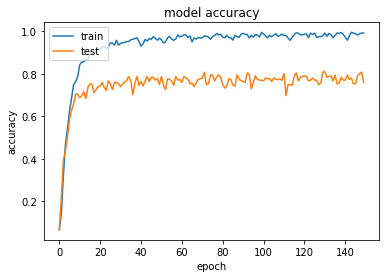

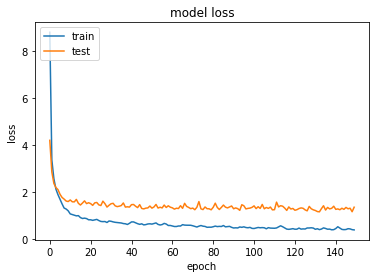

k =  2


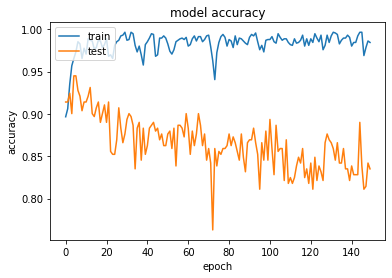

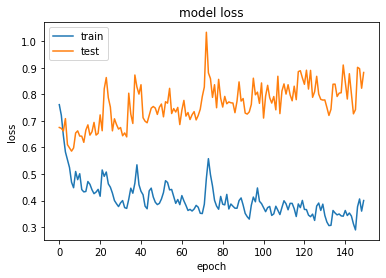

k =  3


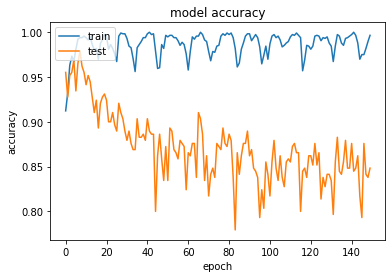

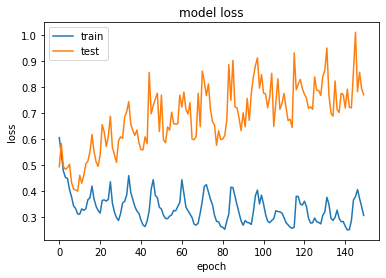

k =  4


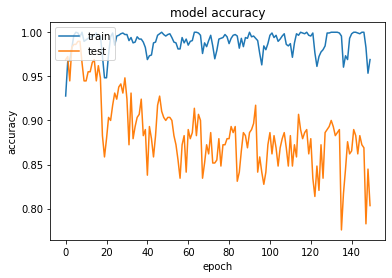

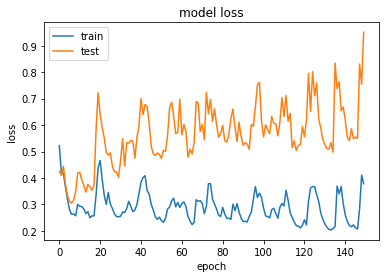

k =  5


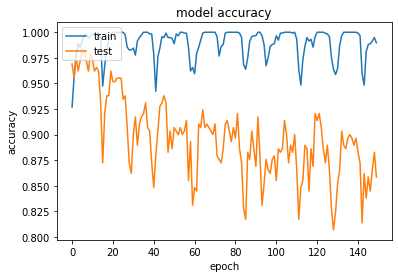

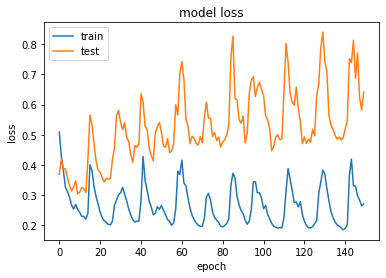

In [ ]:
# summarize history for accuracy
sns.reset_orig()
filename = '/content/drive/My Drive/Notebook/Training_Files/history_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

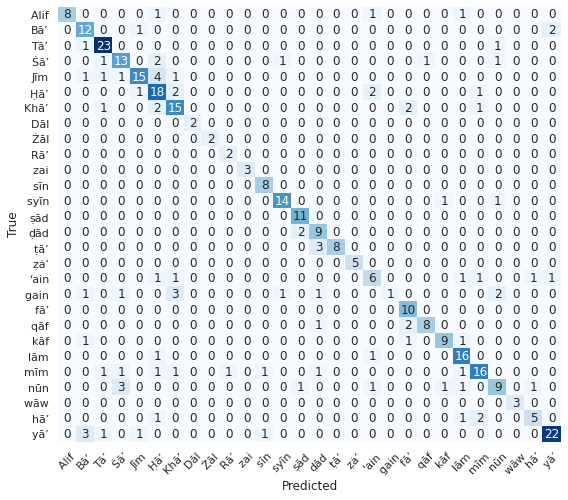

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

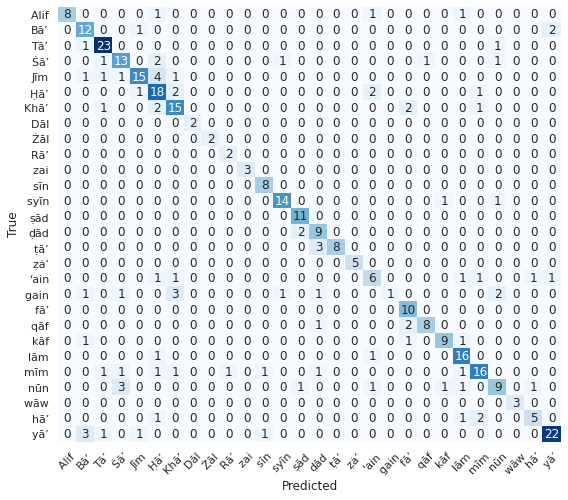

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

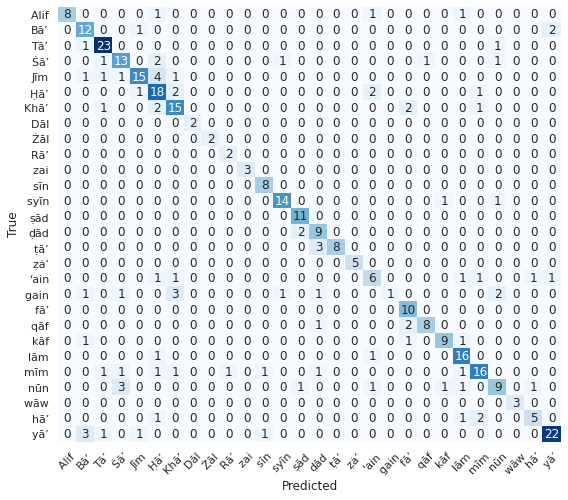

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

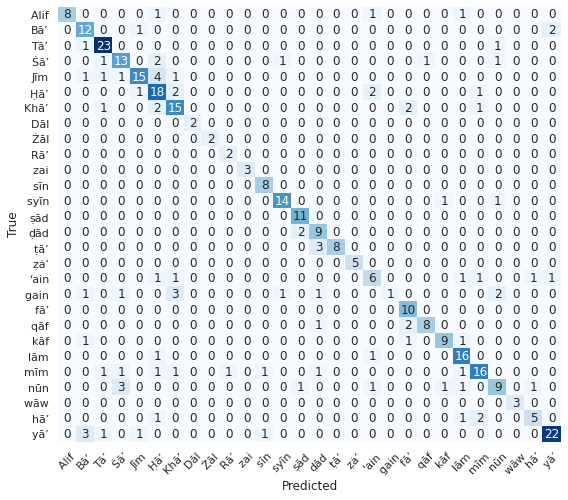

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

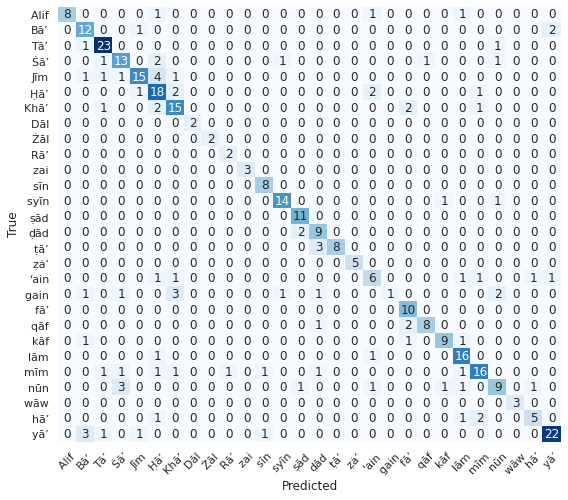

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

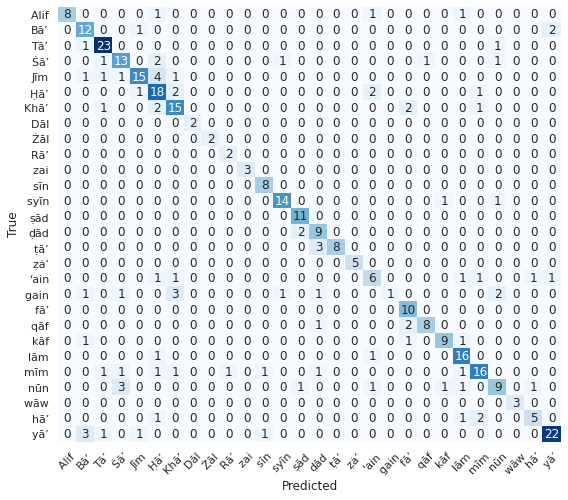

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

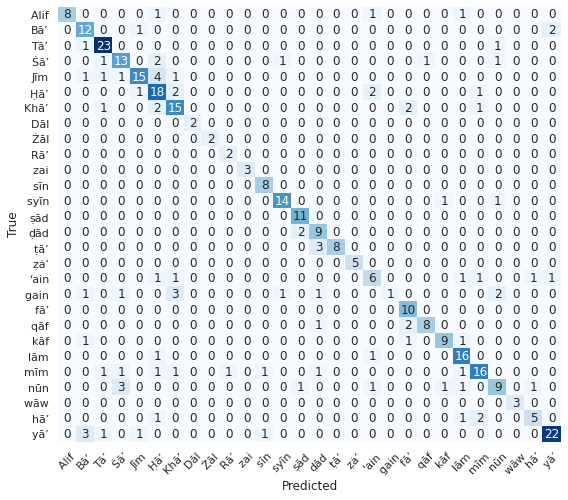

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

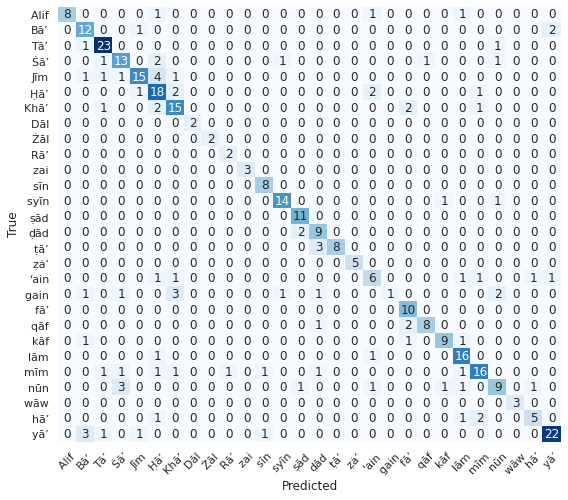

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

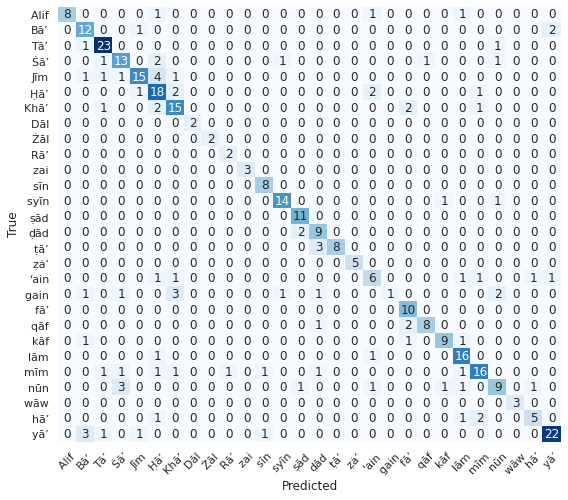

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

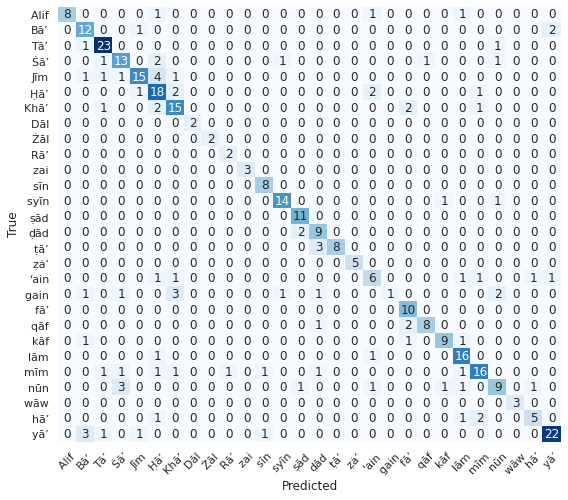

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

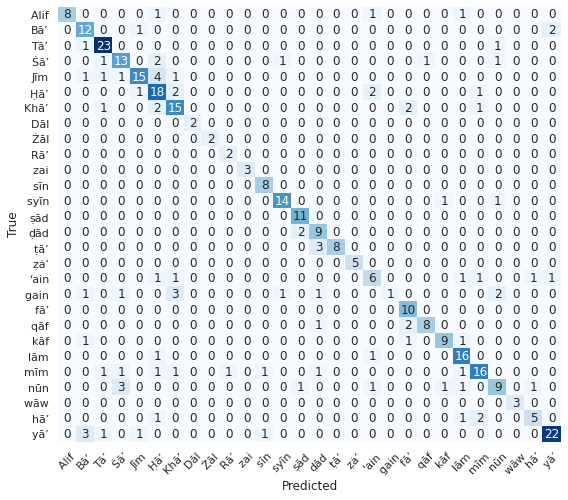

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

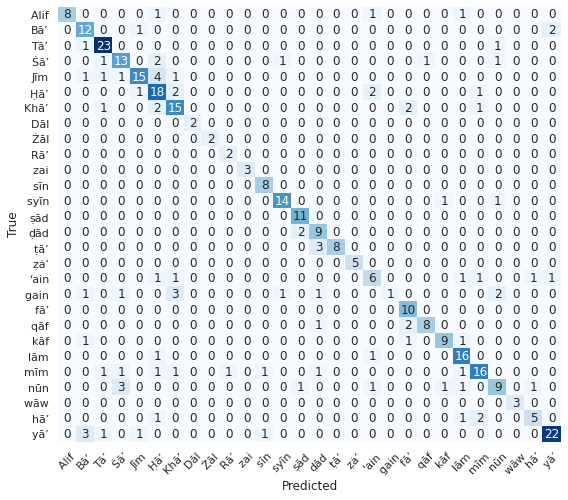

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

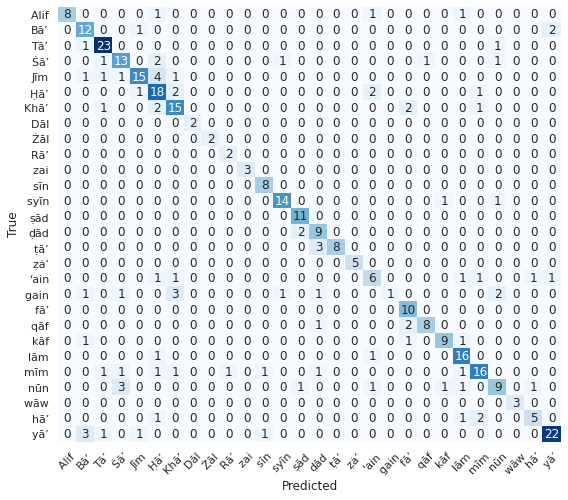

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

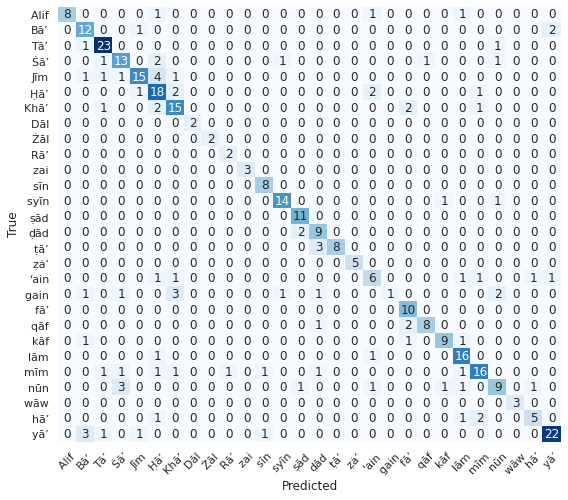

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

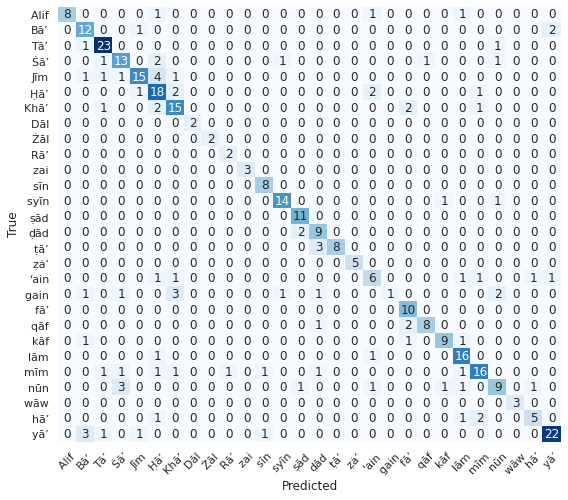

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

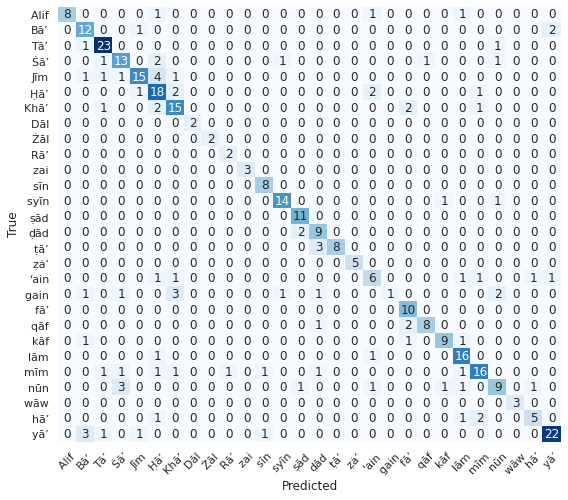

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

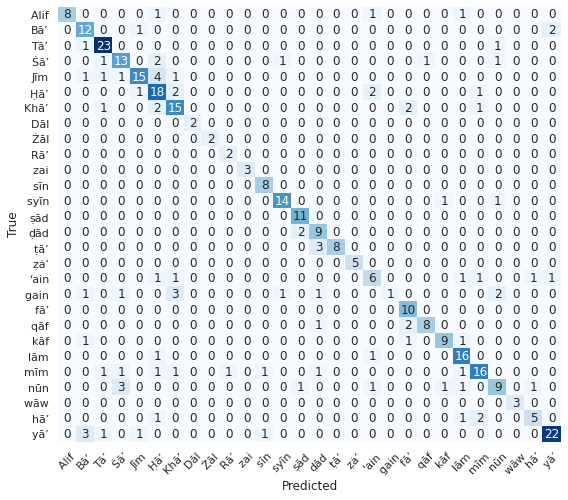

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

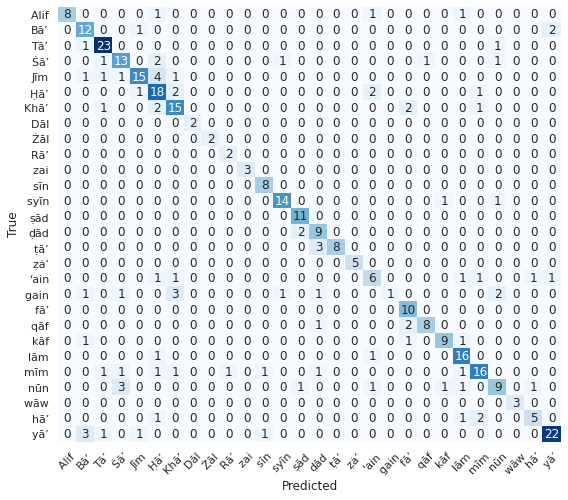

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

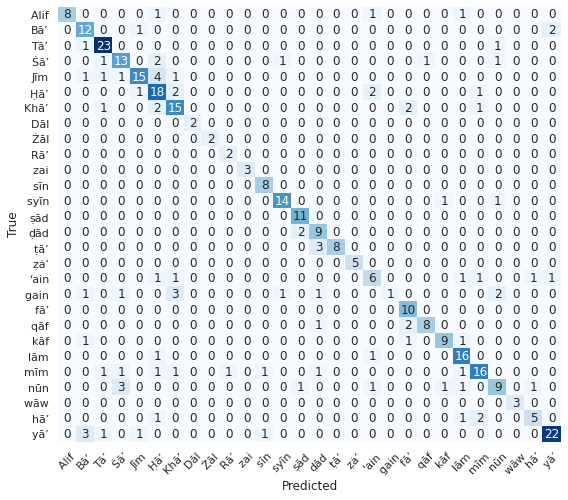

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

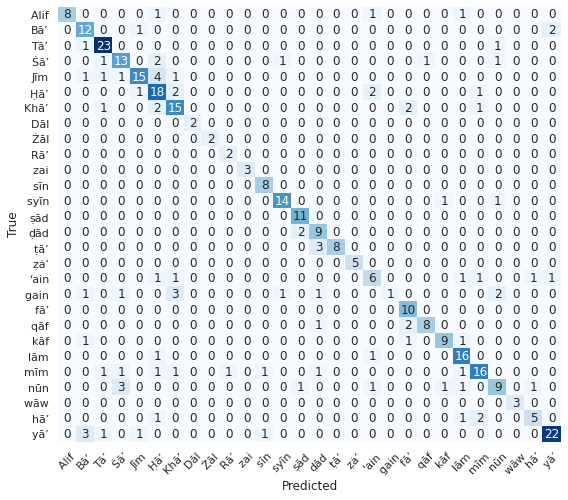

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

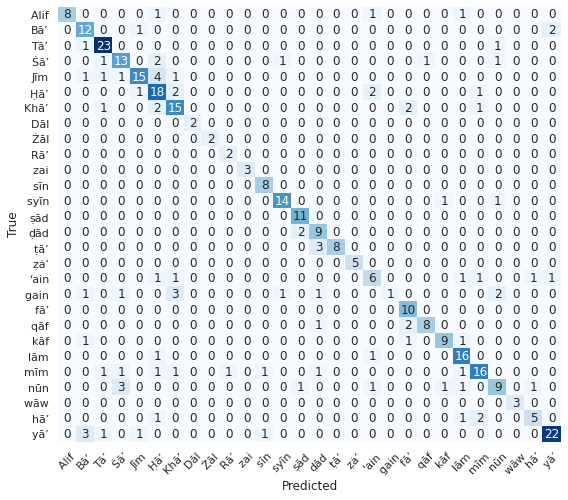

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

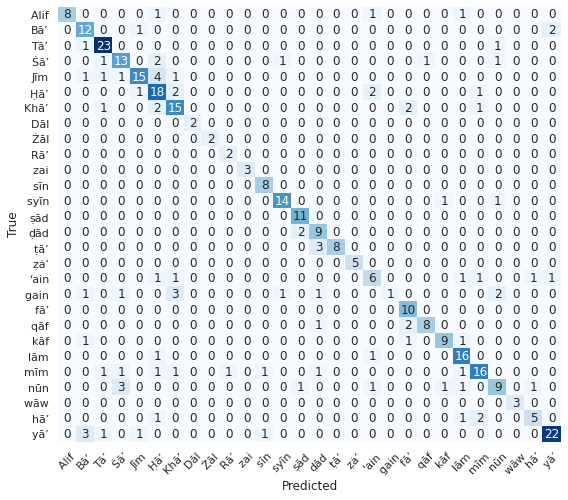

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

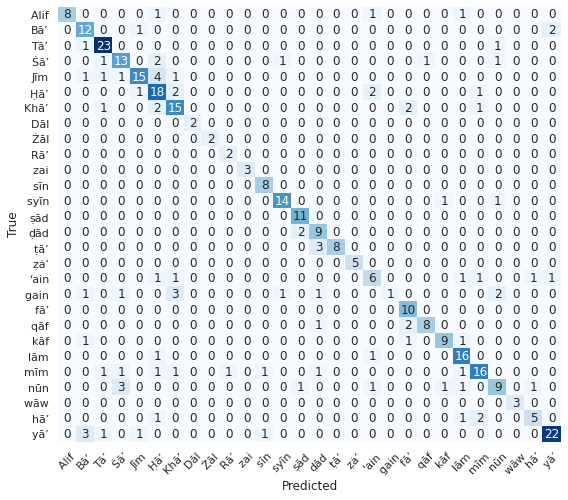

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

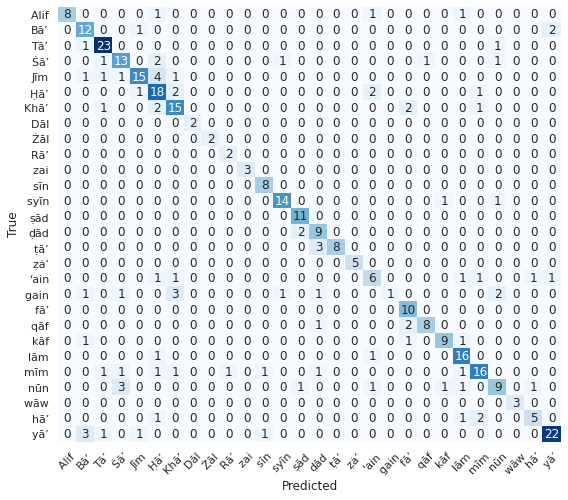

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

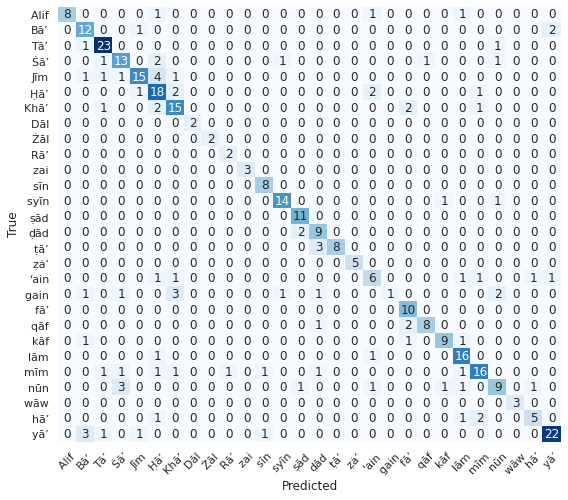

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

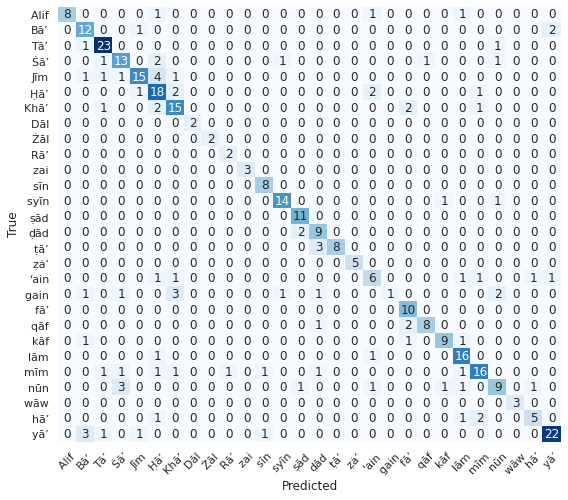

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

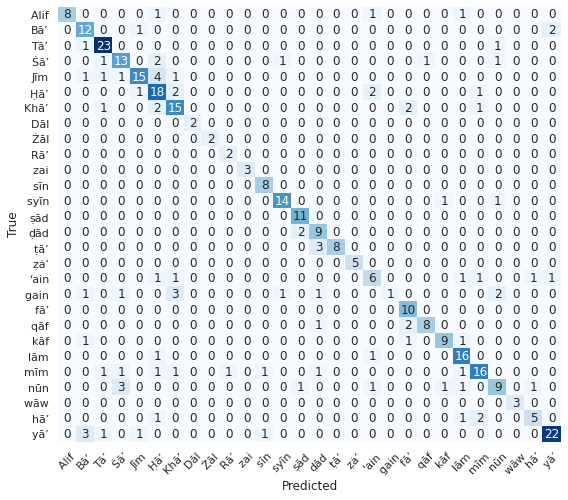

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

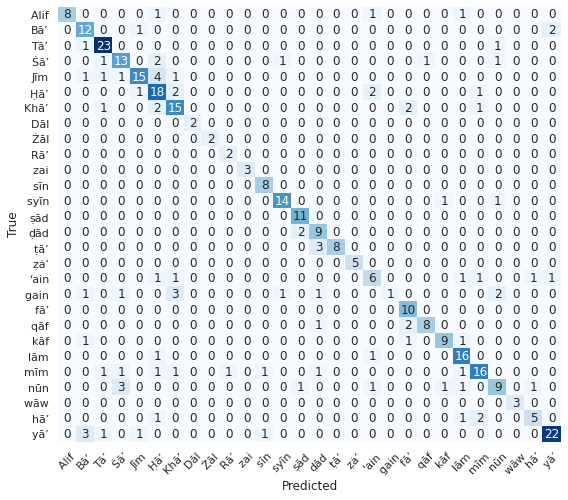

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

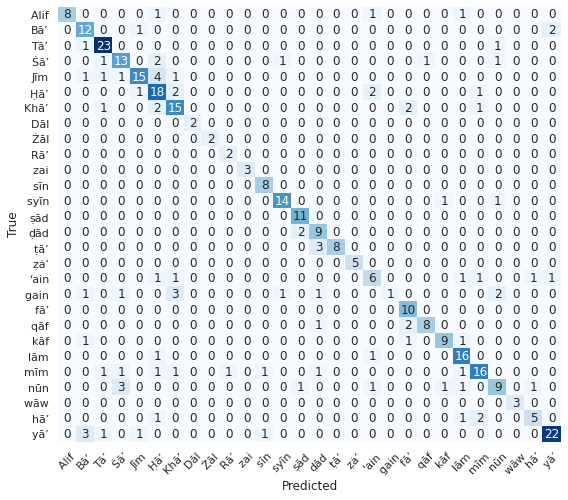

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

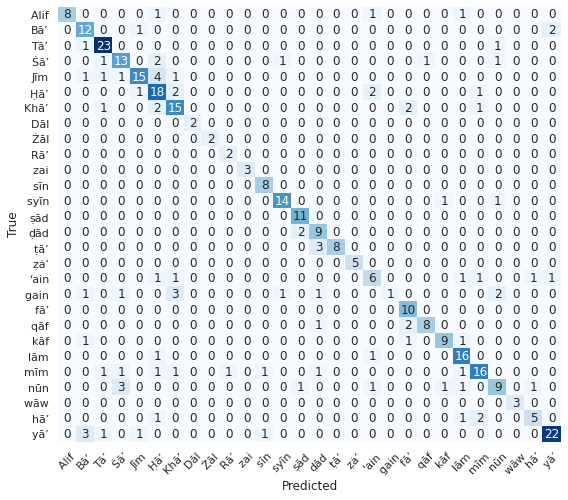

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

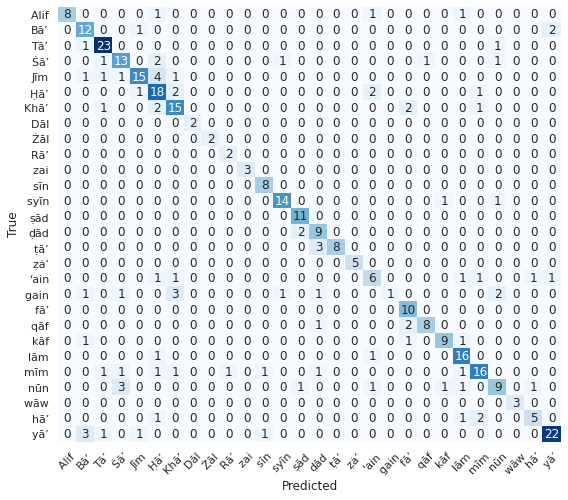

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

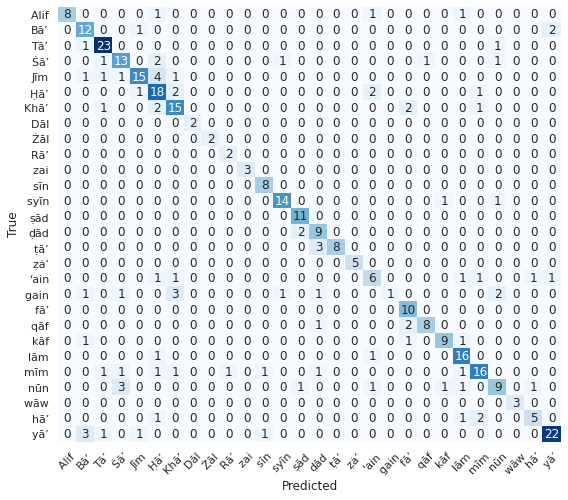

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

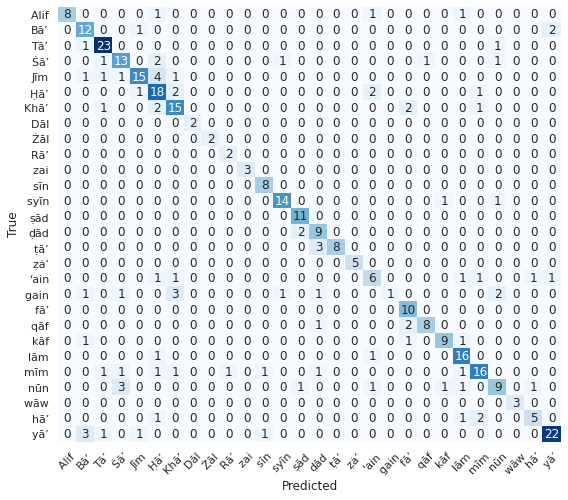

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

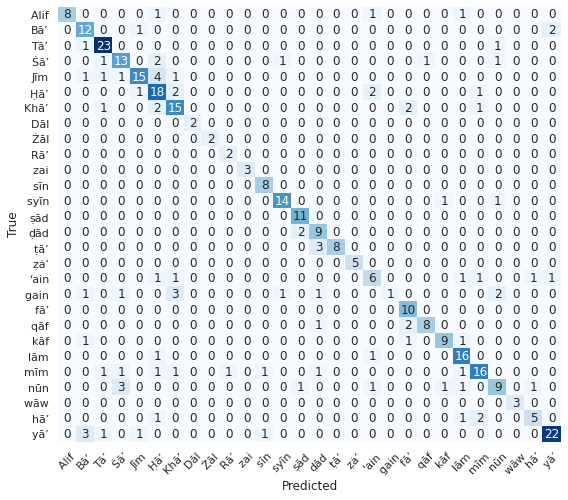

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

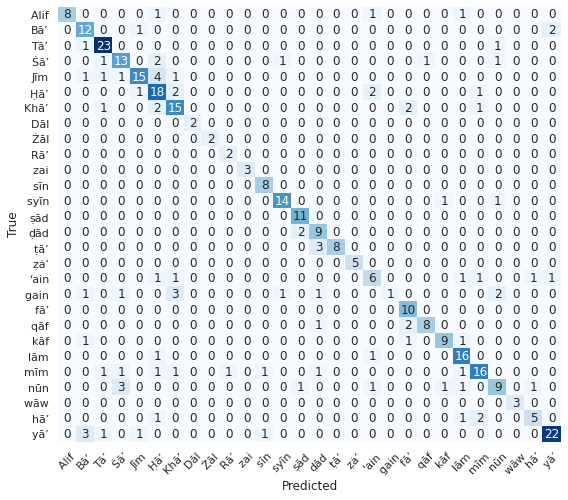

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

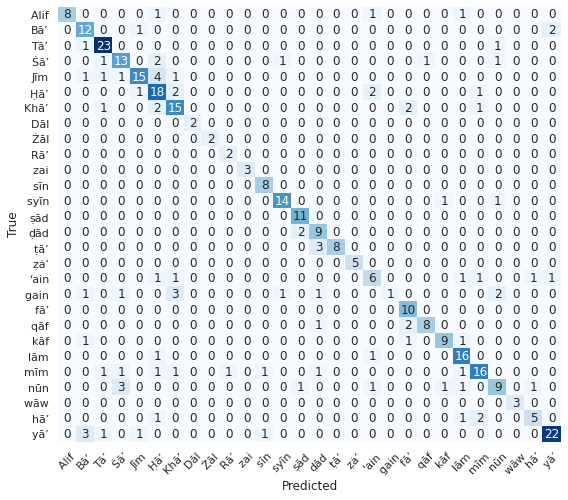

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.63      0.80      0.71        15
           2       0.82      0.92      0.87        25
           3       0.68      0.68      0.68        19
           4       0.83      0.65      0.73        23
           5       0.58      0.75      0.65        24
           6       0.65      0.71      0.68        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       0.88      0.88      0.88        16
          13       0.79      1.00      0.88        11
          14       0.60      0.82      0.69        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.55    

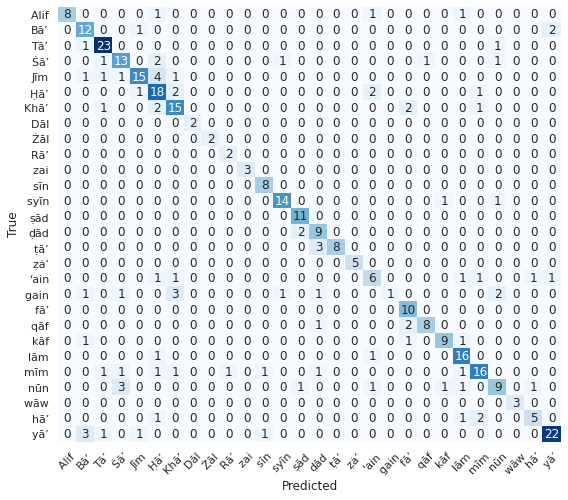

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)